### Introduction
This project is mainly for people who aim to relocate to a different city due to a new job offering and wish to live up to their standards in the new city.
<br>
I will try to provide suggestions on the neighborhoods based on what factors need to be considered gathered from particular individual.
<br>
In this project, we will make few assumptions.
1. The new city is assumed to be unfamiliar to the individual. For our purpose, assuming the city is Los Angeles. 
2. The individual is assumed to be Stella, software engineer, who has been working and living in New York City for years.
3. The individual is assumed to be well aware of the new job salary. For our purpose, assuming the annual income is $120,000 / year.

### Business Problem
In this project, I will be focus on problems Stella might encounter while deciding to taking on a new job offering in Los Angeles.
<br>
Before moving to a different city for the new job, there are many factors that one need to consider. As per example, Stella has the following concerns.
- Since she's new to the city, she would like to live in somewhere safe. 
- She would like to rent a place. The price is open for discussion depends on location and other attributes.
- She doesn't cook as often, so she would like to live around various restaurants
- Being close to various venues other than restaurants is a big plus.
<br>

The real challenge starts from how do we use these factors to make reasonable suggestions to Stella, so that she can better adapt to the new environment as well as living up to her standards.
<br>
Now let's break it into parts. I will be analyzing each part separately and then integrating all parts together for final analysis and visualization.
<br>

1st problem is, what data will be based on in order to determine whether a particular area of the city is considered safer than other areas?
<br>
2nd problem is, what data will be used in order to determine which apartment Stella should rent?
<br> 
3rd problem is, instead of filtering all restaurants near one particular area, what other criteria will be needed to filter various types of restaurant? ie. Chinese food, Indian food and Italian food, etc.
<br>
4th problem is, various venues are way to general, is there a way to prioritize certain venues over others?

### Data Acquiring and How it will be used
1. The first piece of information needed in my opinion would be Los Angeles Crime Data, which can be obtained at https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-Present/63jg-8b9z. For our purpose however, I will use a much smaller sample of this dataset which can be obtained at https://usc.data.socrata.com/Los-Angeles/Part-I-Crimes-LA-/qfdv-ru39.
<br>
I will extract the neighborhoods and crime count from the dataset. And from the result I will drop the rows without values. Then I will sum all the crimes together with respect to each neighborhood. The process was similar to what we did in the SQL course.
<br>
2. Secondly I will need the data for housing price and rent cost in Los Angeles. For rent price, https://usc.data.socrata.com/Los-Angeles/Rent-Price-LA-/4a97-v5tx.
<br>
I will extract the neighborhoods and rent price from the dataset. And from the result I will drop the rows without values. Then I will average all the rent price together with respect to each neighborhood. The process will be similar to what we did in the Data Analysis course.
<br>
3. Next, I will use FOURSQUARE API to obtain the remaining data about venues around each neighborhood. This includes restaurants and others. 
I will filter the neighborhoods which offer big variety of types of restaurants, as well as other venues. And I will sum all the venues together with respect to each neighborhood. Then I will list top 10 common venues for each neighborhood. Segmenting and clustering all the neighborhoods with respect to required features. The process will be similar to what we did in the last three modules.
<br>
Finally, after all the gathered data being analyzed, I will combine all the data into one table. I will make several visualizations including plot, charts, map and some machine learning algorithm for segmenting and clustering. This process will be similar to what we did in the Data Visualization course. Then based on all the previous work, I will make reasonable suggestions as the solution of this problem proposed in the project. 
<br>
Additional analysis will be included based on target audience's prefered weights on different factors. This process consists of scaling dataset according to weight distribution.

<font color=red>First thing to be noted is that all the datasets listed are found on the Internet from various websites. I cannot guarantee the accuracy of the data itself. Second thing to be noted is that the data acquired is different compared to the proposed problem from week 1. This is due to the lack of dataset on house price. As well as, lack of data on transportation on FOURSQUARE.</font>


### Methodology  and Exploratory Data Analysis
I started off by exploring the correlations between different factors including crime count, rent prices, number of Restaurants and number of other venues. As a long time resident in New York City, Stella suspects that there should be a possible relation between crime count and rent price. One would assume that the neighborhoods with lower crime count will probably have higher rent price. As a result, I ran the corr() function on the dataset and plotted it with a regression line which will be shown below.
<br>
#### Relation between crime count and rent price
|           |Count	  |Amount|
|---:|---:|---:|
|Count	|1.000000	|0.062265|
|Amount	|0.062265	|1.000000|

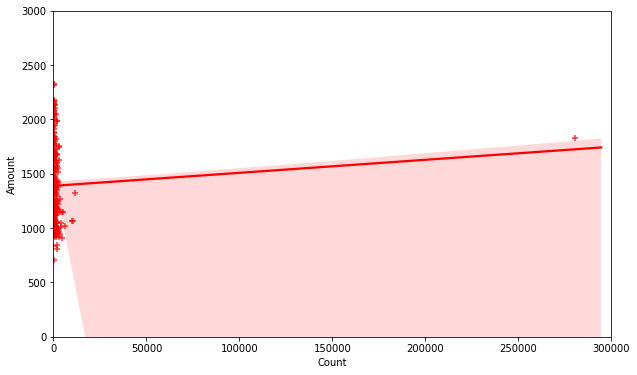
<br>
Next, as Stella weights nearby number of various restaurants as another main factor, maybe there could be some relation between the number of restaurants and rent price. The reason is that for the conveniency and occupancy of having lots of restaurants, most of the nearby renting space will probably be venues too. Therefore, the rent price will most likely to be higher as well. Once again, this seems to be the case in New York City. So I ran the corr() function on the dataset and plotted it with a regression line which will be shown below.
<br>
#### Relation between number of restaurants and rent price
|                        |Number of Restaurants	   |Amount|
|---:|---:|---:|
|Number of Restaurants	             |1.000000	|-0.045927|
|               Amount	            |-0.045927	 |1.000000|

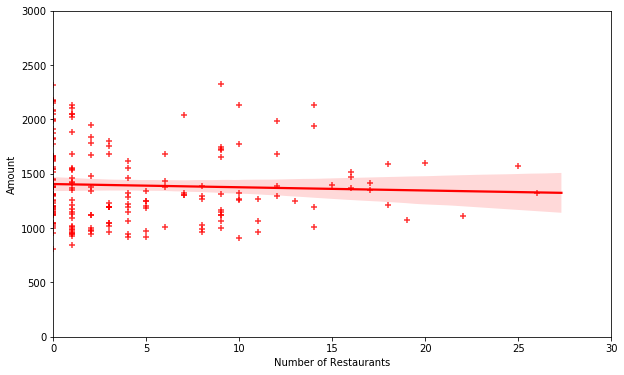
<br>
Let's move on to other venues. By the same analysis, there might be a relation between the number of venues and rent price. Check out the results below.
<br>
#### Relation between number of venues and rent price
|                    |Number of Venues	  |Amount|
|---:|---:|---:|
|Number of Venues	        |1.000000	|0.006193|
|Amount	                    |0.006193	|1.000000|

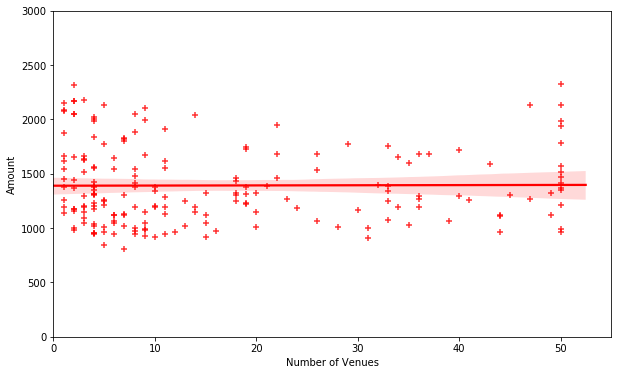
<br>
Better yet, one could also suspect that the possible relation between crime count and number of venues. The reason is that the neighborhoods with higher number of venues are likely to be crowded as well more prone to theft and other crimes, etc. Check out the results below.
<br>
#### Relation between crime count and number of venues
|                    |Number of Venues	    |Count|
|---:|---:|---:|
|Number of Venues	        |1.000000	|-0.035515|
|Count	                   |-0.035515	 |1.000000|

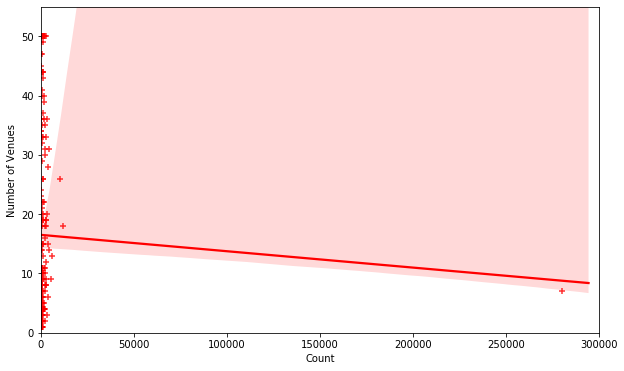
<br>
To further analyze our data, I assigned weights to each factor dataset according to Stella's preference by using the formula [(value-mean)/mean]. This in turn gives us some insights on which neighborhood better fits Stella's overall living standards, which I will discuss in the result session. Check out the result below for the first 5 rows.
<br>
#### Datasets after weight assignment
|Neighborhood	|Count	|Weight_x	|Amount	|Weight_y	|Latitude	|Longitude	|Number of Restaurants	|Weight_z	|Number of Venues	|Weight_w|
|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|
|Adams-Normandie	|541.648985	|0.771291	|920.742857	|0.337153	|34.033081	|-118.297115	|5.0	|0.143713	|10	|-0.391913|
|Agoura Hills	|189.029737	|0.920183	|2052.500000	|-0.477604	|34.136395	|-118.774535	|1.0	|-0.771257	|2	|-0.878383|
|Agua Dulce	|44.202726	|0.981336	|1130.200000	|0.186364	|34.496382	|-118.325635	|1.0	|-0.771257	|7	|-0.574339|
|Alondra Park	|105.068139	|0.955635	|1667.142857	|-0.200184	|33.890134	|-118.335133	|0.0	|-1.000000	|3	|-0.817574|
|Altadena	|521.410078	|0.779837	|1458.321429	|-0.049852	|34.186316	|-118.135233	|1.0	|-0.771257	|18	|0.094556|

<br>
Continuing on with neighborhoods segmenting and clustering using unsupevised Kmeans algorithm with respect all factors. I further clustered all neighborhoods into 15 clusters. This in turn gives us some insights on which cluster of neighborhoods better fits Stella's overall living standards. Check the result in the following map.
<br> 

#### Segmenting and Clustering
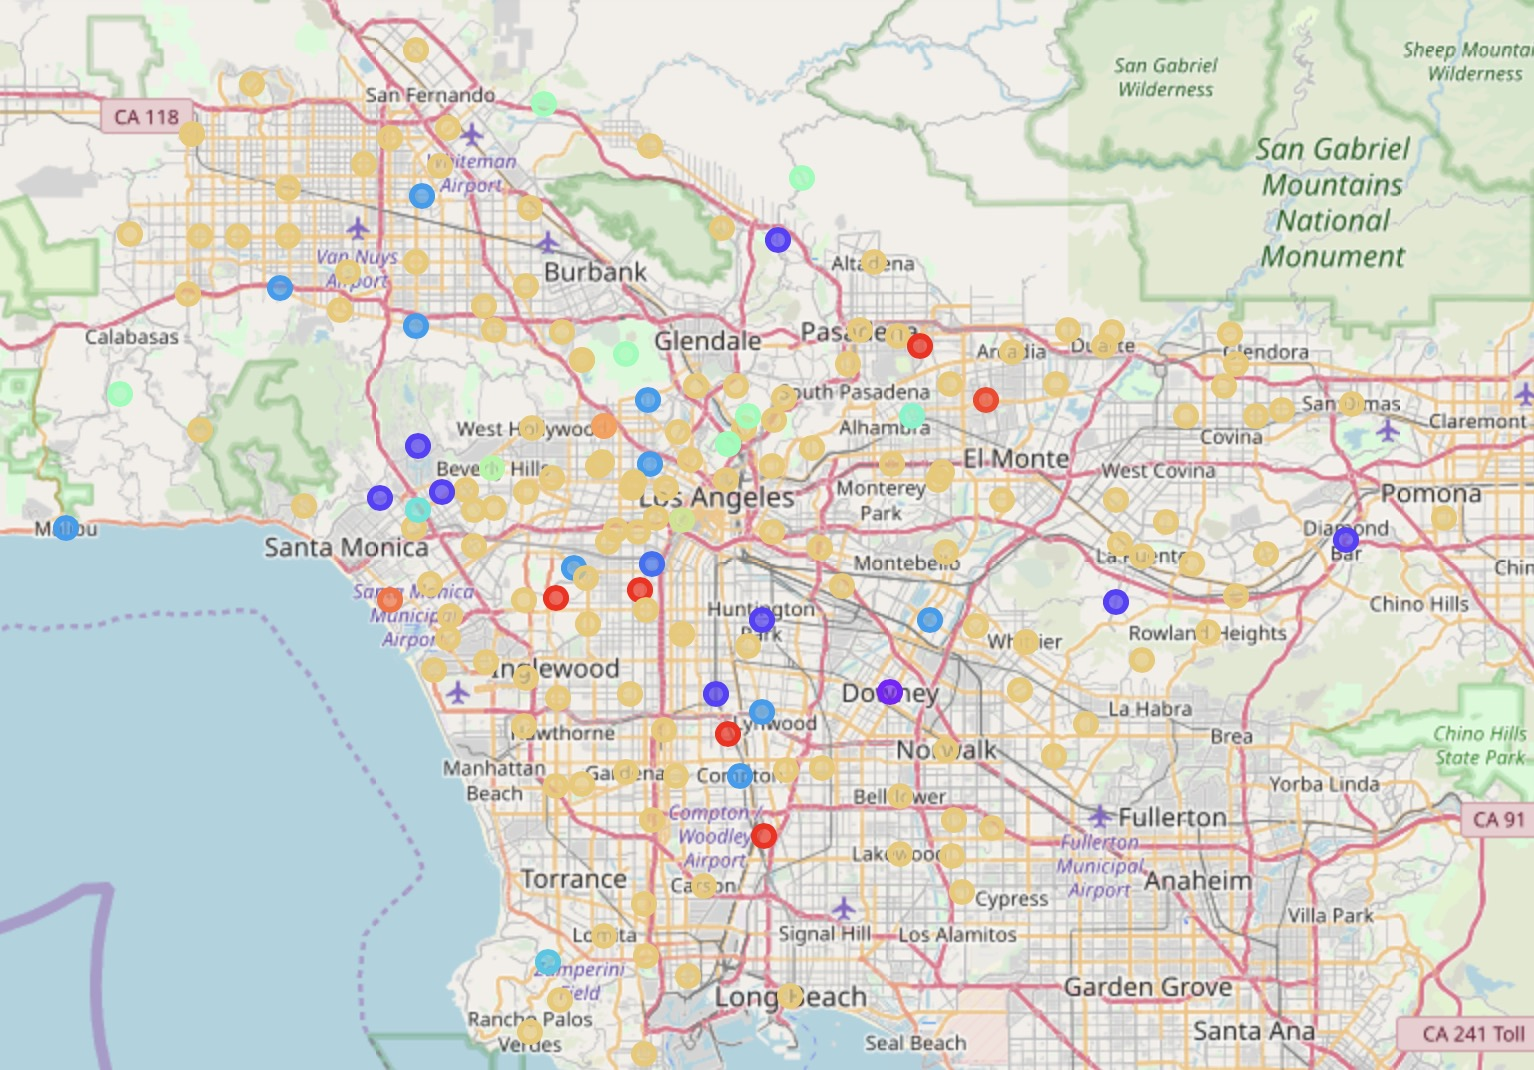

### Results
#### There are two main results here.
1. The weighted overall score according to Stella's preference, which will be shown in the table below. This portion did not use machine learning. It is the result obtained solely by using datasets from Data section.
<br>

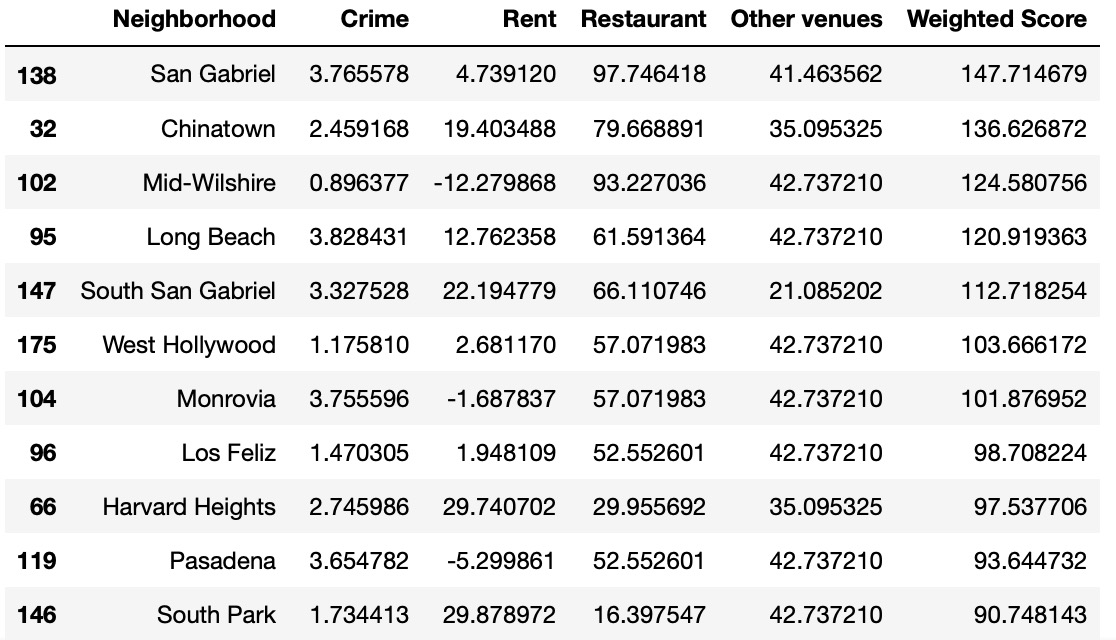
<br>
2. The clusters of neighborhood based on all factors. Here I will only show 3 clusters. For more details, check the Jupyter Notebook. This portion however, used unsupervised Kmeans algorithm to determine similar neighborhoods, namely clusters of neighborhoods that satisfies our proposed conditions.
<br>

##### First Cluster:
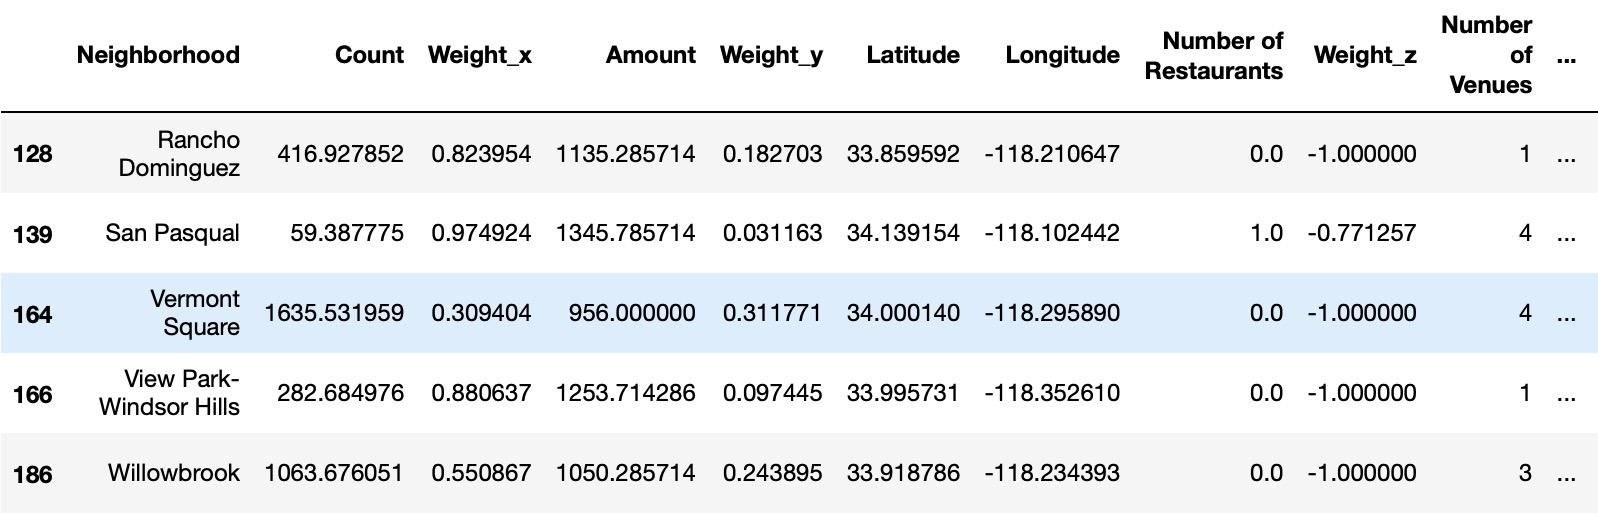
<br>

##### Second Cluster:
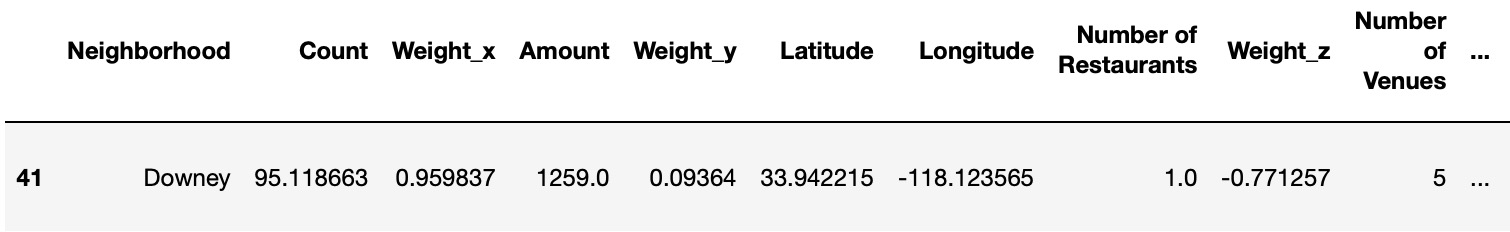
<br>

##### Third Cluster:
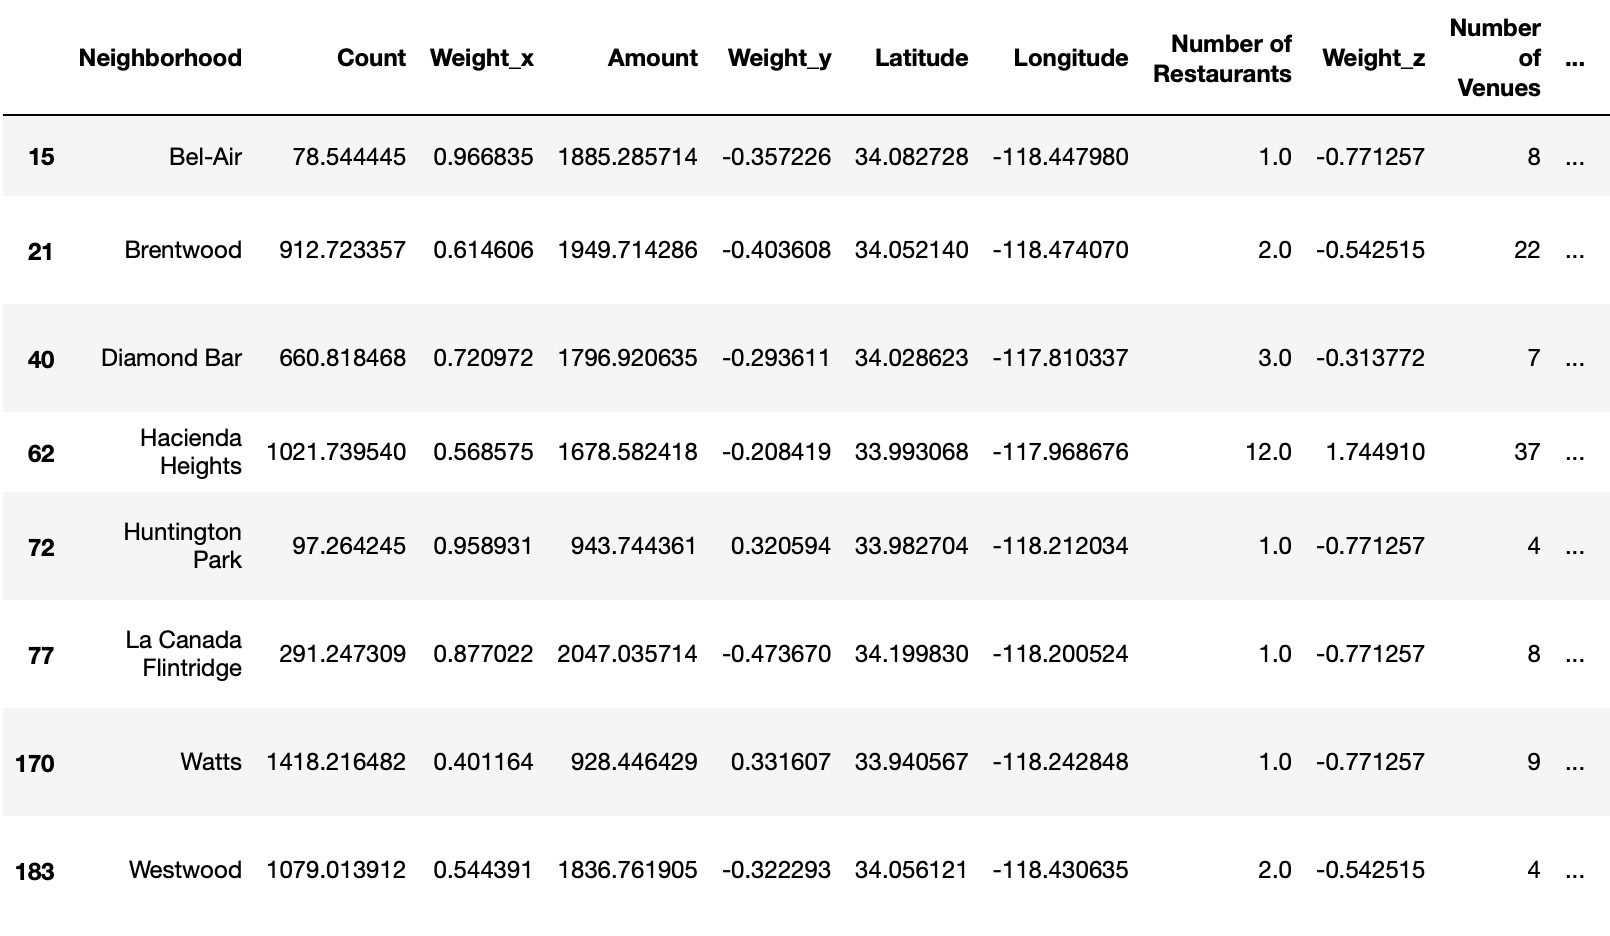

### Discussion
In this project, few things need to be carefully noted. During the first part of data analysis section, I tried to find correlations between different factors. However, the results were much surprising to me. As it turns out, none of them has a strong correlation pairwise. Check out the correlation table below. Please ignore the relation between number of restaurants and number of venues, since restaurant is a venue. Post-project, I realized that I cannot only use New York City as a reference. For example, a neighborhood located in less crowed area with low crime count might still have many venues while the rent price is low as well.
<br>

|       |Count	|Amount	|Number of Restaurants	|Number of Venues|
|---:|---:|---:|---:|---:|
|Count	|1.000000	|0.072283	|-0.046933	|-0.035515|
|Amount	|0.072283	|1.000000	|-0.045927	|0.006193|
|Number of Restaurants	|-0.046933	|-0.045927	|1.000000	|0.844935|
|Number of Venues	|-0.035515	|0.006193	|0.844935	|1.000000|

<br>
Second part of data analysis section, I used weight assignments to each neighborhood to obtain overall performance. This process is highly biased, since each individual prioritizes things differently. It is also very sensitive to data selection, since it highly depends on the analyzed datasets.
<br> 

- Neighborhood Safety weights about 30%
- Rent price weights about 25% 
- Nearby Restaurants weights about 25% 
- Other venues weights about 20% 

<br>
Last part of data analysis section, I used unsupevised Kmeans algorithm to segment and cluster neighborhoods. However, I couldn't determine the best k value using the elbow technique. As a result, the k value I chose was less likely to be optimal. As a result, the clusters generated was less accurate. Post-project, I still haven't figure out what went wrong. Check the elbow diagram below.

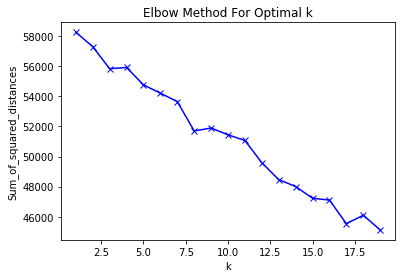

### Recommendation and Suggestion
From the scope of this project, my recommendation is in accordance with the results. 
- If the target audience is high biased on what they want, namely they are determined to follow their own standards, then the biased table will offer the best fitting neighborhood because it weights each factor based on exactly what the audience required assuming we have full confidence in the datasets.
- On the other hand, if the target audience is more flexible on the requried factors, they can still used the biased table as a general reference. However, my suggestion would be taking into consideration of each cluster of neighborhoods. For those clusters which contain a neighborhood with overall higher weights, then other neighborhoods in the same cluster will also be good candidates.


### Conclusion
In this project, I analyzed the neighborhoods in Los Angeles based on individual's preference or living standards. I identified the main factors required, gathered data from reliable sources. After processing the datasets, I explored the possible correlation among each factors. I also combined different datasets into one, calculated its respected weights in order to obtain an overall score for each neighborhood in Los Angeles. I further built a machine learning model with unsupevised Kmean algorithm to cluster neighborhoods with great similarty in terms of required factors. From this model, joint effort with data analysis and data visualization, I provided reasonable suggestion for the target audience. Finally, I discussed shortcomings and potential improvements post-project.